In [8]:
import pandas as pd

# Use the provided csv_path variable for the file path
csv_path = r"C:\Users\Varuni Singh\CI-CD_For_ML\Data\drug.csv"
drug_df = pd.read_csv(csv_path)
drug_df = drug_df.sample(frac=1)
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
153,72,F,LOW,NORMAL,14.642,drugX
130,70,F,NORMAL,HIGH,20.489,DrugY
27,49,F,NORMAL,NORMAL,9.381,drugX
56,65,M,HIGH,NORMAL,11.340,drugB
155,49,M,LOW,HIGH,10.537,drugC


In [9]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3]
num_col = [0,4]

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col),
        ("num_imputer", SimpleImputer(strategy="median"), num_col),
        ("num_scaler", StandardScaler(), num_col),
    ]
)
pipe = Pipeline(
    steps=[
        ("preprocessing", transform),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

In [12]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 98.0% F1: 0.97


In [19]:
with open("C:/Users/Varuni Singh/CI-CD_For_ML/Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {round(accuracy, 2)}, F1 Score = {round(f1, 2)}.")

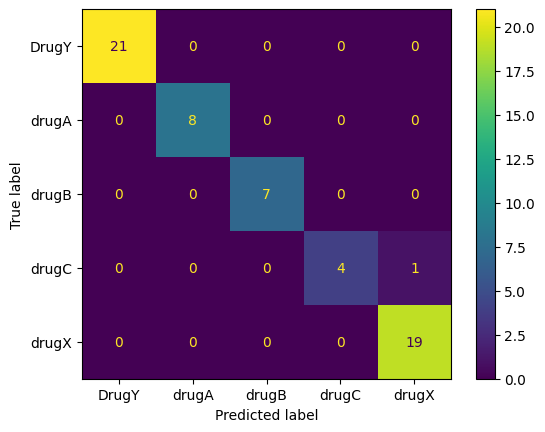

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("C:/Users/Varuni Singh/CI-CD_For_ML/Results/model_results.png", dpi=120)

In [21]:
%pip install skops

import skops.io as sio

sio.dump(pipe, "C:/Users/Varuni Singh/CI-CD_For_ML/Model/drug_pipeline.skops")

  Using cached huggingface_hub-0.33.4-py3-none-any.whl.metadata (14 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
Using cached huggingface_hub-0.33.4-py3-none-any.whl (515 kB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)

   ------------- -------------------------- 1/3 [huggingface-hub]
   ------------- -------------------------- 1/3 [huggingface-hub]
   ------------- -------------------------- 1/3 [huggingface-hub]
   ------------- -------------------------- 1/3 [huggingface-hub]
   -------------------------- ------------- 2/3 [skops]
   -------------------------- ------------- 2/3 [skops]
   ---------------------------------------- 3/3 [skops]

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
print(pipe)  # Shows the pipeline structure


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])
